### Ensemble and Gradient Boosting Model
    Ensemble algorithms
    1) RandomForest Machine --> Bagging method
    2) GradientBoosting Machine --> Boosting method

### Boosting method, Loss vlaue, Gradient Descent method, Back-propagation
    - GradientBoosting algorithm uses Boosting method.
    - By using the Boosting method, model decreases the loss value (ultimately making loss value close to 0) by updating the weight after training-predicting process
    - The way model updates the weight is by using Gradient Descent method which use back-propagation algorithm
    - This algorithm uses Gradient Descent method for training model
    - GradientBoosting has more hyperparameters compare to RandomForest 
      (max_depth, min_sample_split // n_estimators, max_features, n_jobs) //  + learning_rate  (default 0.01)
    - Learning_rate is the most crucial hyperparameter that prevents model from OVERFITTING
    - So the outcome and efficiency of the model heavily depends on the hyperparameters  >> GridSearch can help
    
### What is Boosting method
    - Compared to RandomForest (bagging method) which uses a number of Decision Tree, Gradient Boosting (boosting method) uses ONLY 1 Decision Tree and repeats the training only on that ONE Decision Tree
    - If ONE Decision Tree has high entropy (=high gini), Boosting method goes back to given Decision Tree model and updates the 
    weight. 
    - Boosting method is focusing on the wrong answers and finding the main reason for being wrong
    - SEQUENTIAL not PARALLEL

In [14]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

cancer= load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)

#cancer_gb = GradientBoostingClassifier(random_state=0)
#cancer_gb = GradientBoostingClassifier(random_state=0, max_depth=1)
cancer_gb = GradientBoostingClassifier(random_state=0, learning_rate=0.01)

# Adding learning_rate and random_state hyperparameters to avoid OVERFITTING

cancer_gb.fit(X_train, y_train)
train_score = cancer_gb.score(X_train, y_train)
test_score = cancer_gb.score(X_test, y_test)
display(train_score, test_score)
print('#'*60)
print('Training dataset Accuracy: {:.3f}'.format(train_score))
print('Test dataset Accuracy: {:.3f}'.format(test_score))

0.9929577464788732

0.916083916083916

############################################################
Training dataset Accuracy: 0.993
Test dataset Accuracy: 0.916


## Feature Importances

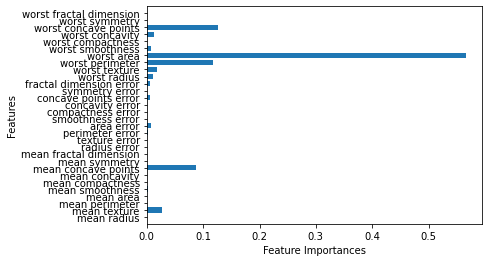

In [14]:
def plot_feature_importances_cancer(gb):
    n_features = cancer.data.shape[1] 
    plt.barh(range(n_features), gb.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('Feature Importances')
    plt.ylabel('Features')
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer(gb)

## Grid Search
    - Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. It is an exhaustive search           that is performed on a the specific parameter values of a model
    - Don't have to manually modify the hyperparameters based on the loss value. Grid Search automatically does it for you

In [16]:
from sklearn.model_selection import GridSearchCV

# GridSearch looks for the most optimal hyperparameters and does the cross-validation among them

In [20]:
param_grid ={
    
    'n_estimators':[100,150,200,250],
    'max_depth': [3,5,7,9],
    'learning_rate': [0.1,0.01,0.02,0.001]
    
}

# Supposing n_estimators, max_depth, learning_rate are the examples chosen as the optimal hyperprameters
# GridSearch go through corss-validation to check the most optimal values in [ ] for each hyperparameters

In [21]:
gmodel = GradientBoostingClassifier()

grid_search = GridSearchCV(gmodel, 
                           param_grid = param_grid,
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 5 folds for each of 64 candidates, totalling 320 fits


{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}

## In summary

In [13]:
gmodel2=GradientBoostingClassifier(random_state=0, learning_rate=0.1)
# learning_rate, random_state are chosen as the hyperparameter

gmodel2.fit(X_train, y_train)

train_score = cancer_gb.score(X_train, y_train)
test_score = cancer_gb.score(X_test, y_test)

print('#'*60)
print('Training dataset Accuracy: {:.3f}'.format(train_score))
print('Trest dataset Accuracy: {:.3f}'.format(test_score))

############################################################
Training dataset Accuracy: 0.984
Trest dataset Accuracy: 0.972
